In [2]:
!pip3 install pandas scikit-learn matplotlib seaborn streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import seaborn
import streamlit

In [8]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

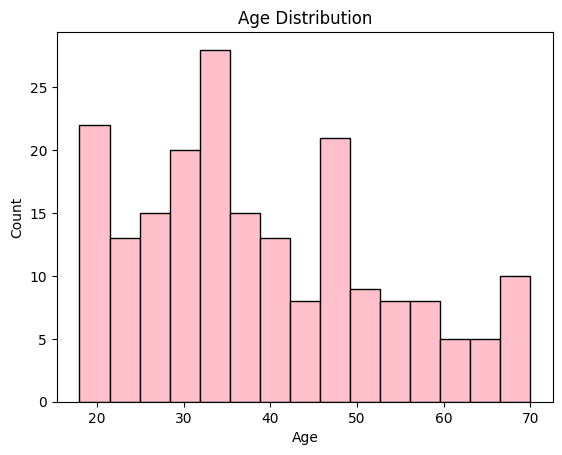

In [14]:
plt.hist(df["Age"], bins=15, edgecolor='black', color = 'pink')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

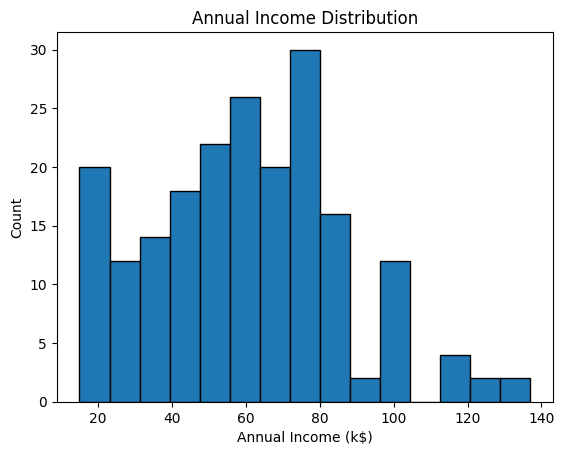

In [15]:
plt.hist(df["Annual Income (k$)"], bins=15, edgecolor='black')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

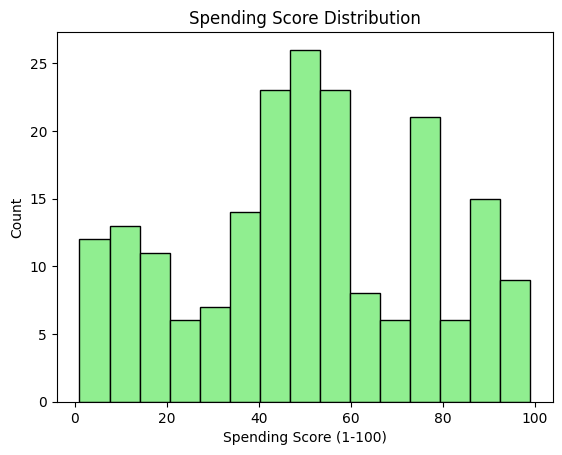

In [25]:
plt.hist(df["Spending Score (1-100)"], bins=15, edgecolor='black', color = 'lightgreen')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()

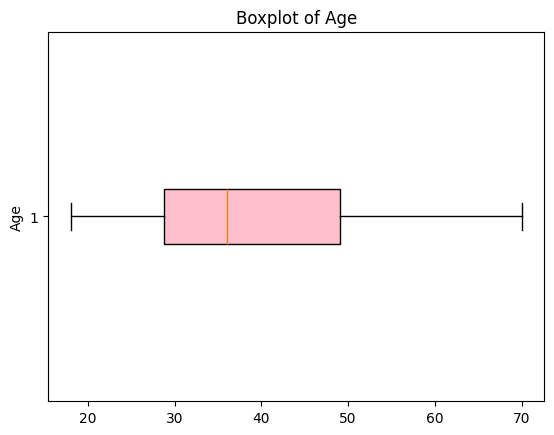

In [39]:
#Age
plt.boxplot(df["Age"], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

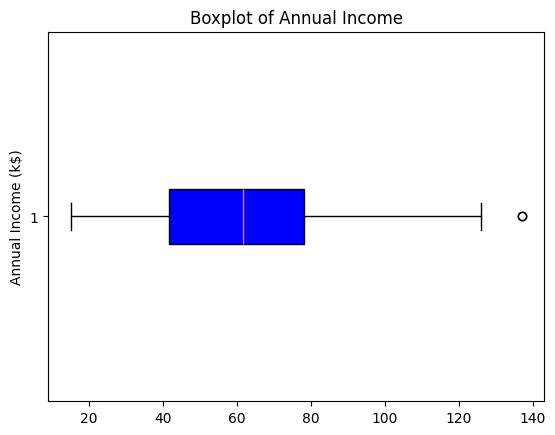

In [44]:
#Annual Income
plt.boxplot(df["Annual Income (k$)"], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
plt.title("Boxplot of Annual Income")
plt.ylabel("Annual Income (k$)")
plt.show()

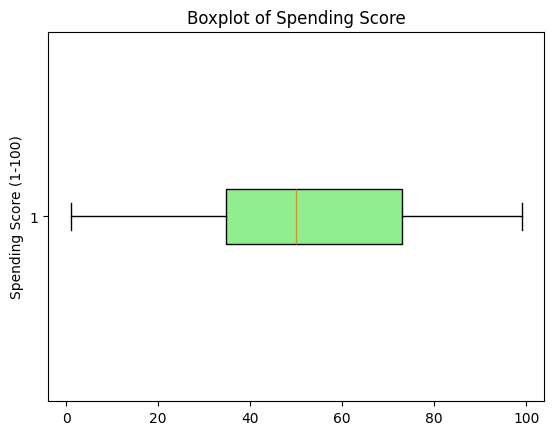

In [42]:
#Spending Score
plt.boxplot(df["Spending Score (1-100)"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot of Spending Score")
plt.ylabel("Spending Score (1-100)")
plt.show()